## Logic For Ticket Line Exceeds

In [1]:
import torch
import os
HOME = os.getcwd()
print(HOME)

import cv2
# from sort import *
import math
import numpy as np
from ultralytics import YOLO
import cvzone

# !pip install ultralytics
import ultralytics
ultralytics.checks()

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

# !pip install supervision==0.18.0
display.clear_output()
import supervision as sv
print("supervision", sv.__version__)

ModuleNotFoundError: No module named 'detectron2'

In [2]:
Input_Video_Path = "/workspace/Metro_Video_Analytics/Ticketing_Line_2_trimmed.avi"
model = YOLO('yolov8m.pt')

# initiate polygon zone
polygon = np.array([
    [130, 750],
    [1350, 410],
    [1040, 270],
    [130, 400],
    [130, 750]
])

# initiate polygon zone
polygon1 = np.array([
    [130, 750],
    [1350, 410],
    [1040, 270],
    [130, 400],
    [130, 750]
])

# create BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=30)
video_info = sv.VideoInfo.from_video_path(Input_Video_Path)

In [3]:
import numpy as np
import supervision as sv

video_info = sv.VideoInfo.from_video_path(Input_Video_Path)
# Put_Text font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)

# extract video frame
generator = sv.get_video_frames_generator(Input_Video_Path)
iterator = iter(generator)
frame = next(iterator)

# detect

results = model(frame, imgsz=1280,classes=0,save_txt=True)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
# detections = byte_tracker.update_with_detections(detections)
print(detections)

# if model.names == "person":
# annotate Bounding Box on Frame
labels = [f"# {traking_id} {model.names[class_id]} {confidence:0.2f}" for traking_id,confidence, class_id in zip(detections.tracker_id,detections.confidence, detections.class_id)]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

# Draw the polygon
cv2.polylines(frame,[polygon], isClosed=False, color=(0, 0, 255), thickness=4)
# Display the current count of boxes inside the polygon on the frame
cv2.putText(frame, "People count exceed the Given Threshold", (20, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
# Display the current count of boxes inside the polygon on the frame
cv2.putText(frame, "People count exceed the Given Threshold", (20, 85), font, 1, (255, 0, 0), 2, cv2.LINE_AA)


list_of_xyxy = detections[0].xyxy
x,y,x1,y1 = list_of_xyxy[0]
print(x,y,x1,y1)

%matplotlib inline  
sv.plot_image(frame, (16, 16))


0: 736x1280 19 persons, 48.2ms
Speed: 6.5ms preprocess, 48.2ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict25
1 label saved to runs/detect/predict25/labels
Detections(xyxy=array([[     1006.3,      174.03,      1111.1,      399.21],
       [     1483.8,      255.52,      1559.4,       412.3],
       [     374.32,      239.57,      485.28,      584.93],
       [     951.37,      179.06,      1024.1,      419.94],
       [     297.88,      240.59,      397.31,      569.03],
       [     853.97,      197.39,      963.24,      421.59],
       [     523.13,      227.78,      607.18,      514.57],
       [     775.34,      209.71,      866.45,       451.2],
       [     648.46,      194.92,      735.49,      495.93],
       [       1440,      180.22,      1486.3,      294.67],
       [     656.61,      54.847,      683.66,      136.68],
       [     932.56,       71.87,      961.17,       170.6],
       [     145.73,       261.6,    

TypeError: 'NoneType' object is not iterable

In [6]:
import numpy as np
import cv2
import cvzone
import supervision as sv

# Put_Text font 
font = cv2.FONT_HERSHEY_SIMPLEX 

# initiate_Bbox annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)
def process_frame(frame: np.ndarray, _) -> np.ndarray:

    zoneAcounter = []
    results = model(frame, imgsz=1280, classes=0)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]
    
    # Draw the polygon
    cv2.polylines(frame, [polygon], isClosed=False, color=(0, 255, 0), thickness=4)
    
        # Draw the polygon
    cv2.polylines(frame, [polygon1], isClosed=False, color=(0, 255, 0), thickness=4)
    # track_result = tracker.update(detections)
    # detections = byte_tracker.update_with_detections(detections1)    
    # print(detections)
    #, tracker_id in , detections.tracker_id
    for xyxy, confidence, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
        
        x1, y1, x2, y2 = xyxy
        # id = tracker_id
        # id = int(tracker_id)
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
        w, h = x2 - x1, y2 - y1
        cx, cy = x1 + w // 2, y2
    
        # Calculate the center point of the bottom line of the bbox
        center = (cx, cy)
        # Check if the center point intersects or passes through the polygon
        if cv2.pointPolygonTest(polygon, center, False) >= 0:
            cv2.circle(frame, (cx, cy), 6, (0, 0, 255), -1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (240, 32, 160), 3)
            cvzone.putTextRect(frame, "Person", [x1 + 8, y1 - 12], thickness=2, scale=1.5)
            zoneAcounter.append(1)  # Store a value of 1 for each bbox inside the polygon

        if cv2.pointPolygonTest(polygon, center, False) >= 0:
            cv2.circle(frame, (cx, cy), 6, (0, 0, 255), -1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (240, 32, 160), 3)
            cvzone.putTextRect(frame, "Person", [x1 + 8, y1 - 12], thickness=2, scale=1.5)
            zoneAcounter.append(1)  # Store a value of 1 for each bbox inside the polygon
    
    if 0 < len(zoneAcounter) < 12: 
        # Display the current count of boxes inside the polygon on the frame
        cv2.putText(frame, f"Total People in Queue = {len(zoneAcounter)}", (20, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
    else:
        # Display the current count of boxes inside the polygon on the frame
        cv2.putText(frame, f"Total People in Queue = {len(zoneAcounter)}", (20, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)
        # Display the current count of boxes inside the polygon on the frame
        cv2.putText(frame, "People count exceed the Given Threshold", (20, 85), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    return frame  
   
    

sv.process_video(source_path=Input_Video_Path, target_path=f"{HOME}/Ticketing_Line_2_trimmed_infered.mp4", callback=process_frame)


0: 736x1280 19 persons, 31.1ms
Speed: 20.6ms preprocess, 31.1ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict25
1 label saved to runs/detect/predict25/labels

0: 736x1280 19 persons, 21.6ms
Speed: 3.8ms preprocess, 21.6ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict25
1 label saved to runs/detect/predict25/labels

0: 736x1280 19 persons, 21.4ms
Speed: 3.8ms preprocess, 21.4ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict25
1 label saved to runs/detect/predict25/labels

0: 736x1280 18 persons, 20.8ms
Speed: 4.5ms preprocess, 20.8ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict25
1 label saved to runs/detect/predict25/labels

0: 736x1280 18 persons, 21.3ms
Speed: 3.7ms preprocess, 21.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
Results s

## Logic For Intrution Detection

In [4]:
import torch
import os
HOME = os.getcwd()
print(HOME)

import cv2
# from sort import *
import math
import numpy as np
from ultralytics import YOLO
import cvzone

# !pip install ultralytics
import ultralytics
ultralytics.checks()

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

# !pip install supervision==0.18.0
display.clear_output()
import supervision as sv
print("supervision", sv.__version__)

supervision 0.18.0


In [7]:
Input_Video_Path = "/workspace/Metro_Video_Analytics/Loitering_4_trimmed.avi"
model = YOLO('yolov8m.pt')

# create BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=30)
video_info = sv.VideoInfo.from_video_path(Input_Video_Path)

road_zoneA = np.array([[425, 705], [565, 710], [640, 600], [520, 600], [425, 705]], np.int32)
# road_zoneB = np.array([[727, 797], [1123, 812], [1001, 516], [741, 525], [730, 795]], np.int32)
# road_zoneC = np.array([[1116, 701], [1533, 581], [1236, 367], [1009, 442], [1122, 698]], np.int32)


0: 736x1280 2 persons, 21.2ms
Speed: 3.7ms preprocess, 21.2ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict26
1 label saved to runs/detect/predict26/labels
Detections(xyxy=array([[     901.57,      315.19,      1040.4,      660.04],
       [     1294.1,      210.65,      1381.3,      477.39]], dtype=float32), mask=None, confidence=array([     0.9114,      0.9003], dtype=float32), class_id=array([0, 0]), tracker_id=array([1, 2]), data={})
901.5713 315.1891 1040.3871 660.0387


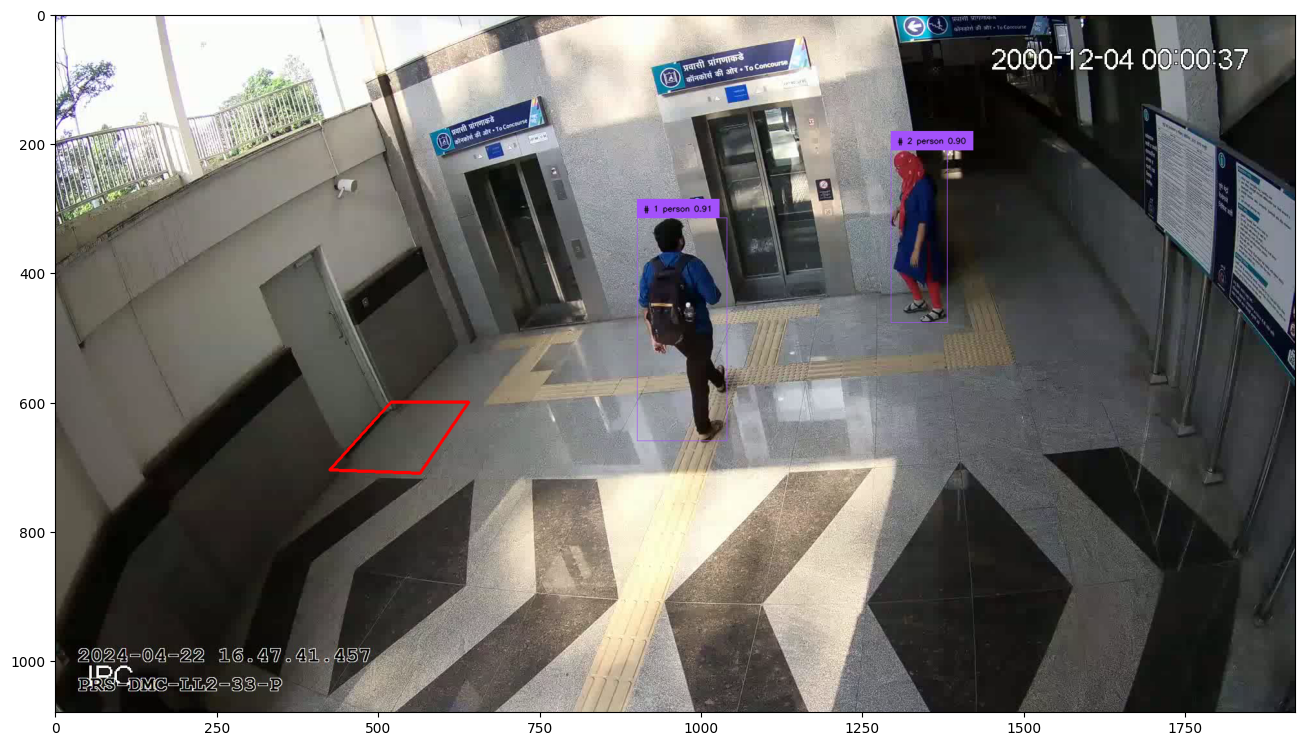

In [8]:
import numpy as np
import supervision as sv

video_info = sv.VideoInfo.from_video_path(Input_Video_Path)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)

# extract video frame
generator = sv.get_video_frames_generator(Input_Video_Path)
iterator = iter(generator)
frame = next(iterator)

# detect

results = model(frame, imgsz=1280,classes=0,save_txt=True)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
detections = byte_tracker.update_with_detections(detections)
print(detections)

# if model.names == "person":
# annotate Bounding Box on Frame
labels = [f"# {traking_id} {model.names[class_id]} {confidence:0.2f}" for traking_id,confidence, class_id in zip(detections.tracker_id,detections.confidence, detections.class_id)]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

# Draw the polygon
cv2.polylines(frame,[road_zoneA], isClosed=False, color=(0, 0, 255), thickness=4)


list_of_xyxy = detections[0].xyxy
x,y,x1,y1 = list_of_xyxy[0]
print(x,y,x1,y1)

%matplotlib inline  
sv.plot_image(frame, (16, 16))

In [9]:
import numpy as np
import cv2
import cvzone
import supervision as sv

# Put_Text font 
font = cv2.FONT_HERSHEY_SIMPLEX 

# initiate_Bbox annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)
def process_frame(frame: np.ndarray, _) -> np.ndarray:

    zoneAcounter = []
    results = model(frame, imgsz=1280, classes=0)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections1 = detections[detections.class_id == 0]
    
    # Check if any bounding boxes intersect or are inside the polygon
    polygon_color = (0, 255, 0)  # Default color is green
    for bbox in detections1.xyxy:
        center = ((bbox[0] + bbox[2]) // 2, bbox[3])
        if cv2.pointPolygonTest(road_zoneA, center, False) >= 0:
            polygon_color = (0, 0, 255)  # Change color to blue if any box intersects or is inside

    # Draw the polygon
    cv2.polylines(frame,[road_zoneA], isClosed=False, color=(0, 255, 0), thickness=4)
    
    for xyxy, confidence, class_id in zip(detections.xyxy, detections.confidence, detections.class_id):
        
        x1, y1, x2, y2 = xyxy
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
        w, h = x2 - x1, y2 - y1
        cx, cy = x1 + w // 2 , y2
    
        # Calculate the center point of the bottom line of the bbox
        center = (cx, cy)
        # Check if the center point intersects or passes through the polygon
        if cv2.pointPolygonTest(road_zoneA, center, False) >= 0:
            cv2.circle(frame, (cx, cy), 6, (0, 0, 255), -1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (240, 32, 160), 3)
            cvzone.putTextRect(frame, "Person", [x1 + 8, y1 - 12], thickness=2, scale=1.5)
            zoneAcounter.append(1)  # Store a value of 1 for each bbox inside the polygon

    # Display the current count of boxes inside the polygon on the frame
    cv2.putText(frame, f"{len(zoneAcounter)} Intruders Detected !!!", (20, 50), font, 1, (255, 0, 0), 2, cv2.LINE_AA)

    return frame
    

sv.process_video(source_path=Input_Video_Path, target_path=f"{HOME}/Loitering_4_trimmed_infered.mp4", callback=process_frame)


0: 736x1280 2 persons, 33.9ms
Speed: 19.7ms preprocess, 33.9ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict26
1 label saved to runs/detect/predict26/labels

0: 736x1280 2 persons, 21.6ms
Speed: 4.0ms preprocess, 21.6ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict26
1 label saved to runs/detect/predict26/labels

0: 736x1280 2 persons, 21.6ms
Speed: 3.9ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict26
1 label saved to runs/detect/predict26/labels

0: 736x1280 2 persons, 21.0ms
Speed: 3.9ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict26
1 label saved to runs/detect/predict26/labels

0: 736x1280 2 persons, 21.3ms
Speed: 3.8ms preprocess, 21.3ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
Results saved 

## Logic For Edge_Crossing and Jumping

In [3]:
import torch
import os
HOME = os.getcwd()
print(HOME)

import cv2
# from sort import *
import math
import numpy as np
from ultralytics import YOLO
import cvzone

# !pip install ultralytics
import ultralytics
ultralytics.checks()

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

# !pip install supervision==0.18.0
display.clear_output()
import supervision as sv
print("supervision", sv.__version__)

supervision 0.18.0


In [3]:
Input_Video_Path = "PF_EdgeCrossing_2.avi"
model = YOLO('yolov8l.pt')


In [4]:
# create BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=30, match_thresh=0.8, frame_rate=30)
video_info = sv.VideoInfo.from_video_path(Input_Video_Path)
line1 = [690, 1010,1040,200]
line2 = [410,1050, 1007, 210]
yellow_line_counter = []
Edge_line_counter = []


0: 736x1280 9 persons, 48.1ms
Speed: 9.4ms preprocess, 48.1ms inference, 17.9ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict10
1 label saved to runs/detect/predict10/labels
Detections(xyxy=array([[     1063.4,      240.27,      1104.8,      343.47],
       [       1116,      234.32,      1150.8,      314.12],
       [     601.97,      237.34,      615.66,      274.25],
       [     1086.9,      196.87,      1116.1,      261.56],
       [     750.51,      202.99,      765.57,      245.03]], dtype=float32), mask=None, confidence=array([    0.82065,     0.58703,     0.46979,     0.44403,     0.41266], dtype=float32), class_id=array([0, 0, 0, 0, 0]), tracker_id=array([1, 2, 3, 4, 5]), data={})
1063.3591 240.27467 1104.8218 343.47412


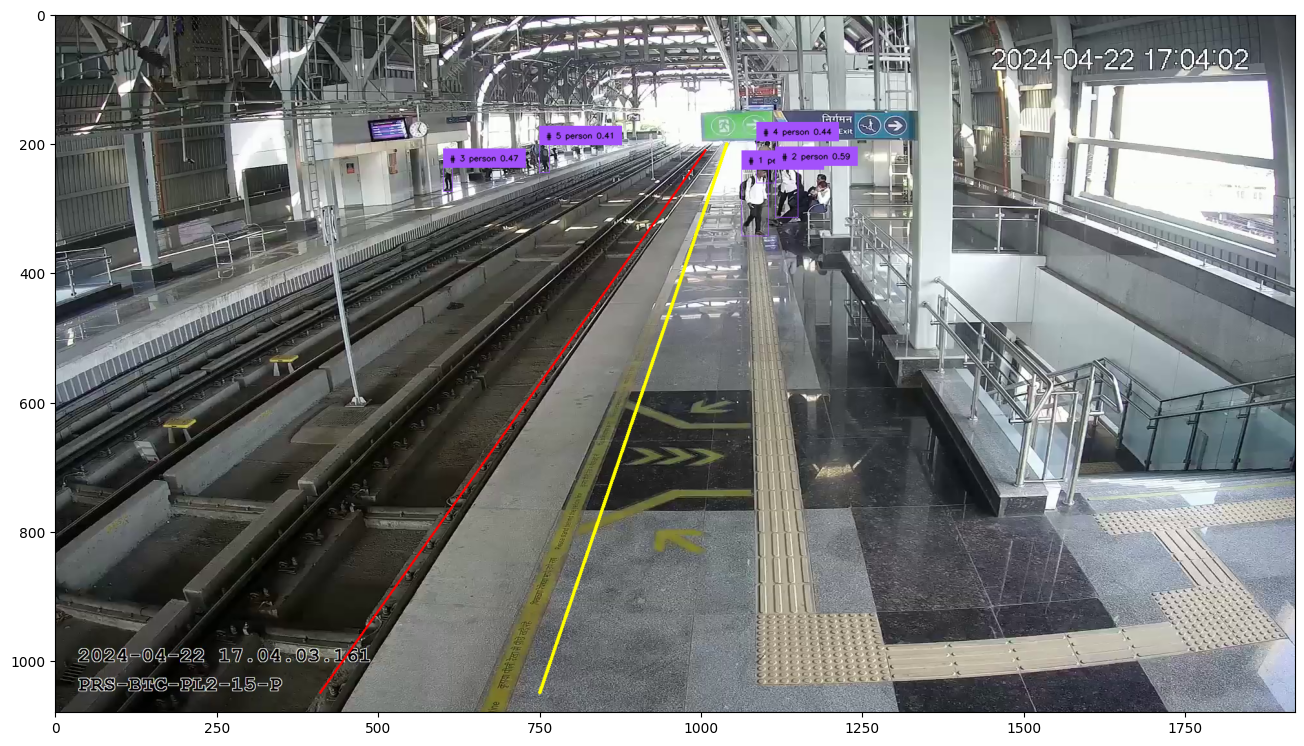

In [5]:
import numpy as np
import supervision as sv

video_info = sv.VideoInfo.from_video_path(Input_Video_Path)

# initiate annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)

# extract video frame
generator = sv.get_video_frames_generator(Input_Video_Path)
iterator = iter(generator)
frame = next(iterator)

# detect

results = model(frame, imgsz=1280,classes=0,save_txt=True)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
detections = byte_tracker.update_with_detections(detections)
print(detections)

# if model.names == "person":
# annotate Bounding Box on Frame
labels = [f"# {traking_id} {model.names[class_id]} {confidence:0.2f}" for traking_id,confidence, class_id in zip(detections.tracker_id,detections.confidence, detections.class_id)]
frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

#Drawing Line on frame
cv2.line(frame,(line1[0],line1[1]),(line1[2],line1[3]),(0,255,255),3)

#Draw The 2nd Line For Jump
cv2.line(frame,(line2[0],line2[1]),(line2[2],line2[3]),(0,0,255),2)

list_of_xyxy = detections[0].xyxy
x,y,x1,y1 = list_of_xyxy[0]
print(x,y,x1,y1)

%matplotlib inline  
sv.plot_image(frame, (16, 16))

In [12]:
import numpy as np
import supervision as sv

yellow_line_counter = []
Edge_line_counter = []

# Put_Text font 
font = cv2.FONT_HERSHEY_SIMPLEX 

# initiate_Bbox annotators
box_annotator = sv.BoxAnnotator(thickness=1, text_thickness=1, text_scale=0.4)
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    
    results = model(frame, imgsz=1280,classes=0)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections1 = detections[detections.class_id == 0]
    
    #Drawing Line on frame
    cv2.line(frame,(line1[0],line1[1]),(line1[2],line1[3]),(0,255,255),3)

    #Draw The 2nd Line For Jump
    cv2.line(frame,(line2[0],line2[1]),(line2[2],line2[3]),(0,0,255),3)
    
    # track_result = tracker.update(detections)
    detections = byte_tracker.update_with_detections(detections1)    
    print(detections)
    for xyxy, confidence, class_id, tracker_id in zip(detections.xyxy,detections.confidence,detections.class_id,detections.tracker_id):
        
        x1,y1,x2,y2 = xyxy
        id = tracker_id
        x1, y1, x2, y2, id = int(x1), int(y1), int(x2), int(y2),int(tracker_id)
    
        w,h = x2-x1,y2-y1
        cx,cy = x1+w//2 , y2
    
        cv2.circle(frame,(cx,cy),6,(0,0,255),-1)
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),3)
        cvzone.putTextRect(frame,f'{id}',
                           [x1+8,y1-12],thickness=2,scale=1.5)
        
        # Assuming line is represented as (x1, y1, x2, y2)
        m1 = (line1[3] - line1[1]) / (line1[2] - line1[0])  # Slope
        b1 = line1[1] - m1 * line1[0]  # Intercept

        cy1expected = m1 * cx + b1  # Expected cy for a given cx on the line

        # Check if cy is within a certain range of cy1expected
        if (cy1expected - 10) < cy < (cy1expected + 10):
            # Increment count or perform desired action
            cv2.line(frame, (line1[0], line1[1]), (line1[2], line1[3]), (255, 0, 0), 3)
            cv2.putText(frame,f'ALLERT !!!! - Defined Yellow Line Crosses',[200,100],font,fontScale=2.3,color=(0,255,255),thickness=3)
            if yellow_line_counter.count(id) == 0:
                yellow_line_counter.append(id)

                # Assuming line is represented as (x1, y1, x2, y2)
        m2 = (line2[3] - line2[1]) / (line2[2] - line2[0])  # Slope
        b2 = line2[1] - m2 * line2[0]  # Intercept

        cy2expected = m2 * cx + b2  # Expected cy for a given cx on the line

        # Check if cy is within a certain range of cy1expected
        if (cy2expected - 10) < cy < (cy2expected + 10):
            # Increment count or perform desired action
            cv2.line(frame, (line2[0], line2[1]), (line2[2], line2[3]), (255, 0,0), 3)
            cv2.putText(frame,f'ALLERT !!!! - Edge Line is crossed',[200,300],font,fontScale=2.3,color=(0,0,255),thickness=3)
            if Edge_line_counter.count(id) == 0:
                Edge_line_counter.append(id)
    
    
    # cv2.putTextRect(frame,f'ALLERT !!!! - Defined Yellow Line Crosses',[200,100],thickness=3,scale=2.3,border=2)
    return frame

sv.process_video(source_path=Input_Video_Path, target_path=f"{HOME}/PF_EdgeCrossing_2_1.mp4", callback=process_frame)


    # cv2.imshow('frame',frame)
    # cv2.waitKey(1)


0: 736x1280 1 person, 38.1ms
Speed: 8.7ms preprocess, 38.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict9
1 label saved to runs/detect/predict9/labels
Detections(xyxy=array([[     860.34,      546.91,      924.81,      702.38]], dtype=float32), mask=None, confidence=array([    0.89839], dtype=float32), class_id=array([0]), tracker_id=array([193]), data={})

0: 736x1280 1 person, 38.0ms
Speed: 4.1ms preprocess, 38.0ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predict9
1 label saved to runs/detect/predict9/labels
Detections(xyxy=array([[     860.44,       546.7,      925.09,      702.45]], dtype=float32), mask=None, confidence=array([    0.90107], dtype=float32), class_id=array([0]), tracker_id=array([193]), data={})

0: 736x1280 1 person, 37.0ms
Speed: 3.9ms preprocess, 37.0ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)
Results saved to runs/detect/predi